# Exploring metrics after training

In this example, we dive deeper into our results and compare each partner performance against the federated model

In [1]:
!wget https://raw.githubusercontent.com/SubstraFoundation/distributed-learning-contributivity/Moving-functions/requirements.txt
!pip install -r requirements.txt
!pip install -i https://test.pypi.org/simple/ subtest==0.0.0.8

--2020-08-26 11:57:37--  https://raw.githubusercontent.com/SubstraFoundation/distributed-learning-contributivity/Moving-functions/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     176  --.-KB/s    in 0s      

2020-08-26 11:57:37 (12.0 MB/s) - ‘requirements.txt’ saved [176/176]

     |████████████████████████████████| 378kB 4.7MB/s 
     |████████████████████████████████| 13.1MB 233kB/s 
     |████████████████████████████████| 14.6MB 209kB/s 
     |████████████████████████████████| 7.1MB 45.2MB/s 
     |████████████████████████████████| 225kB 55.6MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 516.2M

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 51kB 2.5MB/s 


In [2]:
# imports
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Object and methodes needed in order to run a collaborative round
from subtest.datasets.dataset import Dataset
from subtest.scenario import Scenario

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


## Quick scenario run 

In [3]:
scenario_params = {
    'partners_count': 3,
    'amounts_per_partner': [0.2, 0.5, 0.3],
}

scenario_params['epoch_count'] = 20
scenario_params['minibatch_count'] = 3

current_scenario = Scenario(scenario_params)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],  28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

input_shape = (28, 28, 1)
num_classes = 10


def preprocess_dataset_labels(y):
    y = np_utils.to_categorical(y, 10)
    return y


def generate_new_model_for_dataset():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


current_scenario.dataset = Dataset(
    "my_dataset",
    X_train,
    X_test,
    y_train,
    y_test,
    input_shape,
    num_classes,
    preprocess_dataset_labels,
    generate_new_model_for_dataset
)


2020-08-26 11:59:41.534 | DEBUG    | subtest.scenario:__init__:58 - Dataset selected: mnist
2020-08-26 11:59:41.535 | DEBUG    | subtest.scenario:__init__:93 - Computation use the full dataset for scenario #1
2020-08-26 11:59:41.630 | INFO     | subtest.scenario:__init__:282 - ### Description of data scenario configured:
2020-08-26 11:59:41.631 | INFO     | subtest.scenario:__init__:283 -    Number of partners defined: 3
2020-08-26 11:59:41.632 | INFO     | subtest.scenario:__init__:284 -    Data distribution scenario chosen: random
2020-08-26 11:59:41.632 | INFO     | subtest.scenario:__init__:285 -    Multi-partner learning approach: fedavg
2020-08-26 11:59:41.633 | INFO     | subtest.scenario:__init__:286 -    Weighting option: uniform
2020-08-26 11:59:41.634 | INFO     | subtest.scenario:__init__:287 -    Iterations parameters: 20 epochs > 3 mini-batches > 8 gradient updates per pass
2020-08-26 11:59:41.634 | INFO     | subtest.scenario:__init__:293 - ### Data loaded: mnist
2020-08

In [4]:
current_scenario.run()

2020-08-26 11:59:42.346 | INFO     | subtest.scenario:split_data:537 - ### Splitting data among partners:
2020-08-26 11:59:42.348 | INFO     | subtest.scenario:split_data:538 -    Simple split performed.
2020-08-26 11:59:42.349 | INFO     | subtest.scenario:split_data:539 -    Nb of samples split amongst partners: 38880
2020-08-26 11:59:42.350 | INFO     | subtest.scenario:split_data:541 -    Partner #0: 7776 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-26 11:59:42.352 | INFO     | subtest.scenario:split_data:541 -    Partner #1: 19440 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-26 11:59:42.354 | INFO     | subtest.scenario:split_data:541 -    Partner #2: 11664 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-26 11:59:42.659 | DEBUG    | subtest.scenario:compute_batch_sizes:585 -    Compute batch sizes, partner #0: 324
2020-08-26 11:59:42.660 | DEBUG    | subtest.scenario:compute_batch_sizes:585 -    Compute batch sizes, partner #1: 810
2020-08-26

0

## Let's play  a bit more with the results

First, let's see how our loss behaves

In [5]:
losses = current_scenario.mpl.loss_collective_models
print(losses)

[0.7246013363202413, 0.4239598858356476, 0.29185992566744484, 0.17471819365024566, 0.13561829618612925, 0.11245284730196, 0.09873731760183971, 0.08153030655781428, 0.07199945332606633, 0.06661586263775826, 0.057607334246238075, 0.05434472371637821, 0.050003364970286686, 0.050359763503074646, 0.04793964476386706, 0.042741909022132554, 0.04883911690115929, 0.045783267865578334, 0.041294588242967924, 0.049410043726364775]


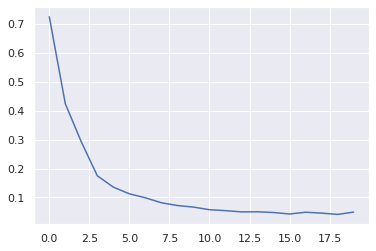

In [6]:
x = range(len(losses))
y = losses

sns.lineplot(x=x, y=y)        

### Let's see how our accuracy score goes between each partner and compare it with aggregated model performance

First, let's see every accuracy value on each minibatch, for each partner on epoch 1-3

In [7]:
x= current_scenario.mpl.score_matrix_per_partner
print(x[:3]) 

[[[0.54633331 0.59583336 0.493     ]
  [0.73425001 0.7446667  0.74650002]
  [0.77625    0.77391666 0.80608332]]

 [[0.79166669 0.80266666 0.82725   ]
  [0.87358332 0.85100001 0.86183333]
  [0.85250002 0.90058333 0.83758336]]

 [[0.87658334 0.89525002 0.89074999]
  [0.88883334 0.90658331 0.89783335]
  [0.90275002 0.91624999 0.91350001]]]


This is a lot of information to deal with, for now, we will only work with the first minibatch of each epoch

In [8]:
x = x[:,:,0]
print(x[:3])

[[0.54633331 0.73425001 0.77625   ]
 [0.79166669 0.87358332 0.85250002]
 [0.87658334 0.88883334 0.90275002]]


Now let's pack this information into a single dataframe

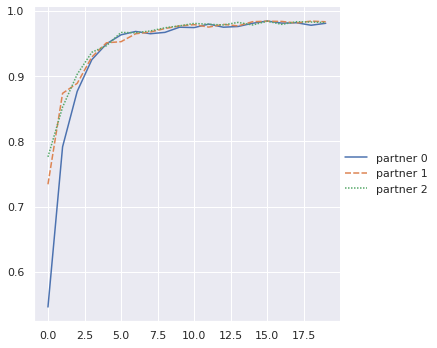

In [9]:
d = {
    'partner 0' : x[:,0],
    'partner 1' : x[:,1],
    'partner 2' : x[:,2]
}

df = pd.DataFrame(d)

sns.relplot(data = df, kind = "line")

### Now let's compare this result to our averaged model

In [10]:
x_collective = current_scenario.mpl.score_matrix_collective_models

print(x_collective)

[[0.06566667 0.54658335 0.75758332 0.80916667]
 [0.80916667 0.82833332 0.87424999 0.88475001]
 [0.88475001 0.89183331 0.90758336 0.91425002]
 [0.91425002 0.93416667 0.94641668 0.94700003]
 [0.94700003 0.95333332 0.95933336 0.95899999]
 [0.95899999 0.96675003 0.96316665 0.96633333]
 [0.96633333 0.97333336 0.97183335 0.97266668]
 [0.97266668 0.96933335 0.97833335 0.97708333]
 [0.97708333 0.977      0.98066664 0.97941667]
 [0.97941667 0.98183334 0.98049998 0.97966665]
 [0.97966665 0.98258334 0.98408335 0.98341668]
 [0.98341668 0.98275    0.98325002 0.98500001]
 [0.98500001 0.98474997 0.98483336 0.98650002]
 [0.98650002 0.98691666 0.98641664 0.98583335]
 [0.98583335 0.98575002 0.98624998 0.98624998]
 [0.98624998 0.98724997 0.98783332 0.98741668]
 [0.98741668 0.98750001 0.98833334 0.98583335]
 [0.98583335 0.98791665 0.98783332 0.98666668]
 [0.98666668 0.98675001 0.986      0.98858333]
 [0.98858333 0.98733336 0.98799998 0.986     ]]


We will just focus ourselves on the first mini batch of each epoch again

           0
0   0.065667
1   0.809167
2   0.884750
3   0.914250
4   0.947000
5   0.959000
6   0.966333
7   0.972667
8   0.977083
9   0.979417
10  0.979667
11  0.983417
12  0.985000
13  0.986500
14  0.985833
15  0.986250
16  0.987417
17  0.985833
18  0.986667
19  0.988583


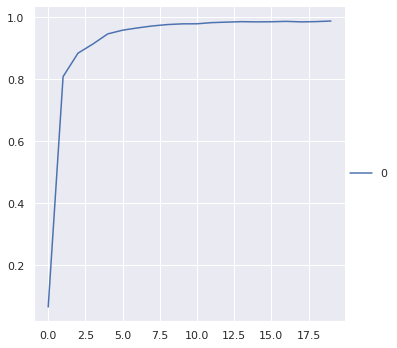

In [11]:
x_collective = x_collective[:,0]

df_collective = pd.DataFrame(x_collective)


print(df_collective)

sns.relplot(data = df_collective, kind = "line")

### Now let's compare this model to each partner's model :

In [12]:
d = {
    'partner 0' : x[:,0],
    'partner 1' : x[:,1],
    'partner 2' : x[:,2],
    'Averaged model' : x_collective
}

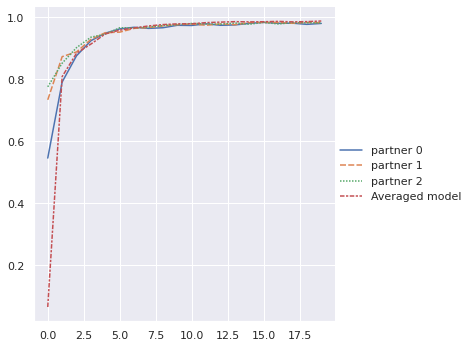

In [13]:
df = pd.DataFrame(d)


sns.relplot(data = df, kind = "line")

### Let's ommit the begining

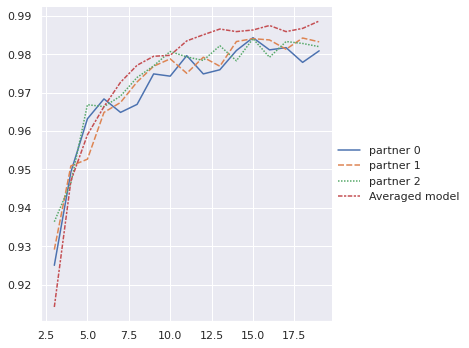

In [14]:
df = df.iloc[3:]
sns.relplot(data = df, kind = "line")

### Results 

The averaged model seems to perform poorly at the start but become better as the training continues